In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('UTY.csv')

In [4]:
df.head()

,Date,10 YR
0,1/30/2017,2.49
1,1/31/2017,2.45
2,2/1/2017,2.48
3,2/2/2017,2.48
4,2/3/2017,2.49


In [5]:
def d2d(xdate):
    parsed = [int(x) for x in xdate.split('/')]
    condate = dt.date(parsed[2], parsed[0], parsed[1])
    return condate

In [6]:
df['Date'] = df['Date'].apply(d2d)

In [7]:
df = df.set_index('Date')

In [8]:
df.plot()

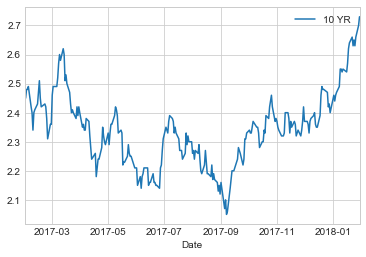

In [9]:
plt.show()

In [10]:
len(df)

252

In [11]:
dfb = df.iloc[:220]

In [12]:
dfb.max()

10 YR    2.62
dtype: float64

In [13]:
df['maxrange'] = 2.62

In [14]:
df.head()

,10 YR,maxrange
Date,,
2017-01-30,2.49,2.62
2017-01-31,2.45,2.62
2017-02-01,2.48,2.62
2017-02-02,2.48,2.62
2017-02-03,2.49,2.62


In [15]:
dfb.min()

10 YR    2.05
dtype: float64

In [16]:
df['minrange'] = 2.05

In [17]:
dfb.median()

10 YR    2.33
dtype: float64

In [18]:
df['medrange'] = 2.33

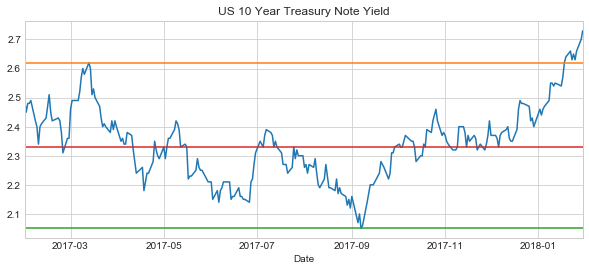

In [19]:
plt.clf()
df.plot(figsize=(10,4), legend=False, title="US 10 Year Treasury Note Yield")
plt.show()

In [20]:
df = df.dropna()

In [21]:
from sklearn import linear_model

In [22]:
df.head()

,10 YR,maxrange,minrange,medrange
Date,,,,
2017-01-30,2.49,2.62,2.05,2.33
2017-01-31,2.45,2.62,2.05,2.33
2017-02-01,2.48,2.62,2.05,2.33
2017-02-02,2.48,2.62,2.05,2.33
2017-02-03,2.49,2.62,2.05,2.33


In [23]:
df[df['10 YR'] == 2.05]

,10 YR,maxrange,minrange,medrange
Date,,,,
2017-09-07,2.05,2.62,2.05,2.33


In [30]:
fb = df['10 YR'][dt.date(2017, 9, 7):]

In [31]:
type(fb)

pandas.core.series.Series

In [32]:
fb = fb.reset_index(drop=True)

In [34]:
y = np.array(fb)

In [36]:
x = np.array([i for i in range(len(y))])

In [38]:
lm = linear_model.LinearRegression()

In [40]:
A = np.vstack([x, np.ones(len(x))]).T

In [41]:
m, c = np.linalg.lstsq(A, y)[0]

In [42]:
print(m, c)

0.00383438466296 2.19878181818


In [43]:
line = m*x + c

In [44]:
pline = pd.Series(line)

In [45]:
df['fit'] = np.nan

In [46]:
df['fit'][dt.date(2017, 9, 7):] = pline

In [47]:
df.plot()

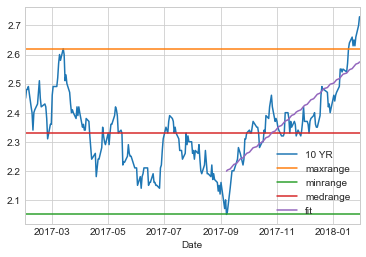

In [48]:
plt.show()

In [49]:
df2 = df.drop(['fit'], axis=1)

In [51]:
from scipy.signal import savgol_filter as svg

In [111]:
d = df2['10 YR'].reset_index(drop=True)

In [112]:
d = np.array(d)

In [113]:
d = svg(d, 51, 8)

In [114]:
d = pd.Series(d)

In [115]:
df2['polyfit'][dt.date(2017,1,30):] = d

In [116]:
df2.head()

,10 YR,maxrange,minrange,medrange,polyfit
Date,,,,,
2017-01-30,2.49,2.62,2.05,2.33,2.515713
2017-01-31,2.45,2.62,2.05,2.33,2.462283
2017-02-01,2.48,2.62,2.05,2.33,2.438940
2017-02-02,2.48,2.62,2.05,2.33,2.433039
2017-02-03,2.49,2.62,2.05,2.33,2.435634


In [117]:
df2.plot(figsize=(10,4))

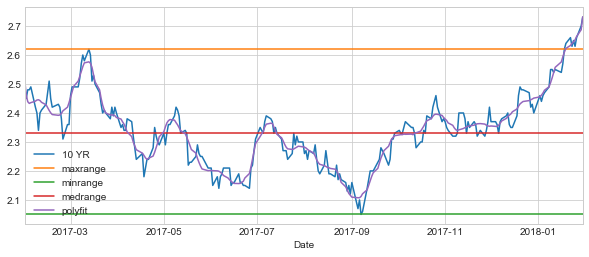

In [118]:
plt.show()